In [1511]:
# import modules

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1512]:
df = pd.read_csv("burnaby_property_result.csv")
columns = df.columns
print(columns)

Index(['@context', '@type', 'name', 'image', 'url', 'price', 'bedrooms',
       'bathrooms', 'size', 'property_type', 'address.@type',
       'address.streetAddress', 'address.addressLocality',
       'address.postalCode', 'address.addressRegion', 'geo.@type', 'geo.name',
       'geo.latitude', 'geo.longitude'],
      dtype='object')


In [1513]:
df.head()

,@context,@type,name,image,url,price,bedrooms,bathrooms,size,property_type,address.@type,address.streetAddress,address.addressLocality,address.postalCode,address.addressRegion,geo.@type,geo.name,geo.latitude,geo.longitude
0,http://schema.org,SingleFamilyResidence,"1788 Gilmore Ave #2406, Burnaby, BC V5C 0L5",https://static.ojohosts.ca/p/1007/R2852626_0_I...,https://www.houseful.ca/burnaby-bc/1788-gilmor...,"$928,000",2,2,900,Single family,PostalAddress,1788 Gilmore Ave #2406,Burnaby,V5C 0L5,BC,GeoCoordinates,"1788 Gilmore Ave #2406, Burnaby, BC V5C 0L5",49.268251,-123.013930
1,http://schema.org,SingleFamilyResidence,"203 7025 Stride Ave #a, Burnaby, BC V3N 4Y1",https://static.ojohosts.ca/p/1007/R2852580_0_U...,https://www.houseful.ca/burnaby-bc/203-7025-st...,"$769,900",3,2,"1,091",Single family,PostalAddress,203 7025 Stride Ave #a,Burnaby,V3N 4Y1,BC,GeoCoordinates,"203 7025 Stride Ave #a, Burnaby, BC V3N 4Y1",49.212058,-122.955049
2,http://schema.org,SingleFamilyResidence,"6699 Dunblane Ave #1706, Burnaby, BC V5H 0J8",https://static.ojohosts.ca/p/1007/R2852573_0_F...,https://www.houseful.ca/burnaby-bc/6699-dunbla...,"$828,000",1,1,614,Single family,PostalAddress,6699 Dunblane Ave #1706,Burnaby,V5H 0J8,BC,GeoCoordinates,"6699 Dunblane Ave #1706, Burnaby, BC V5H 0J8",49.222201,-122.993065
3,http://schema.org,SingleFamilyResidence,"3809 Evergreen Pl #108, Burnaby, BC V3J 0M1",https://static.ojohosts.ca/p/1007/R2852512_0_Q...,https://www.houseful.ca/burnaby-bc/3809-evergr...,"$889,900",2,2,865,Single family,PostalAddress,3809 Evergreen Pl #108,Burnaby,V3J 0M1,BC,GeoCoordinates,"3809 Evergreen Pl #108, Burnaby, BC V3J 0M1",49.250303,-122.894201
4,http://schema.org,SingleFamilyResidence,"2425 Alpha Ave #2506, Burnaby, BC V5C 0K2",https://static.ojohosts.ca/p/1007/R2852525_0_I...,https://www.houseful.ca/burnaby-bc/2425-alpha-...,"$1,098,888",2,2,893,Single family,PostalAddress,2425 Alpha Ave #2506,Burnaby,V5C 0K2,BC,GeoCoordinates,"2425 Alpha Ave #2506, Burnaby, BC V5C 0K2",49.262640,-123.001200


In [1514]:
df.describe()

,geo.latitude,geo.longitude
count,1400.000000,1400.000000
mean,47.978781,-119.816229
std,7.797409,19.472224
min,0.000000,-123.131293
25%,49.224343,-123.003805
50%,49.241578,-122.991438
75%,49.265517,-122.954903
max,49.289896,0.000000


In [1515]:
selected_features = df[['geo.latitude','geo.longitude',
                        'bedrooms','bathrooms',
                        'size']]
print(selected_features.head())


   geo.latitude  geo.longitude bedrooms bathrooms   size
0     49.268251    -123.013930        2         2    900
1     49.212058    -122.955049        3         2  1,091
2     49.222201    -122.993065        1         1    614
3     49.250303    -122.894201        2         2    865
4     49.262640    -123.001200        2         2    893


In [1516]:
def normalize_data(df, selected_features):
    if not pd.api.types.is_numeric_dtype(df["price"].dtype):
        df["price"] = df["price"].str.replace(",","").str.replace("$","").astype(int)
    if not pd.api.types.is_numeric_dtype(selected_features["size"].dtype):
        selected_features["size"] = selected_features["size"].str.replace(",","").astype(int)

    if not pd.api.types.is_numeric_dtype(selected_features["bedrooms"].dtype):
        selected_features["bedrooms"] = selected_features["bedrooms"].str.replace("—","0").astype(int)
    if not pd.api.types.is_numeric_dtype(selected_features["bathrooms"].dtype):
        selected_features["bathrooms"] = selected_features["bathrooms"].str.replace("—","0").astype(int)
normalize_data(df, selected_features)

/var/folders/7l/q57k2__s3qn6rdmnmbdwjwkc0000gn/T/ipykernel_80800/2879989001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["size"] = selected_features["size"].str.replace(",","").astype(int)
/var/folders/7l/q57k2__s3qn6rdmnmbdwjwkc0000gn/T/ipykernel_80800/2879989001.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["bedrooms"] = selected_features["bedrooms"].str.replace("—","0").astype(int)
/var/folders/7l/q57k2__s3qn6rdmnmbdwjwkc0000gn/T/ipykernel_80800/2879989001

In [1517]:
# selected_features = selected_features.drop(columns=["geo.latitude"])
Y = df[['price']]
X = selected_features

print(Y.head())
print(X.head())

for column in X.columns:
    # print(column)
    X[column] = X[column].astype(int)

     price
0   928000
1   769900
2   828000
3   889900
4  1098888
   geo.latitude  geo.longitude  bedrooms  bathrooms  size
0     49.268251    -123.013930         2          2   900
1     49.212058    -122.955049         3          2  1091
2     49.222201    -122.993065         1          1   614
3     49.250303    -122.894201         2          2   865
4     49.262640    -123.001200         2          2   893


/var/folders/7l/q57k2__s3qn6rdmnmbdwjwkc0000gn/T/ipykernel_80800/4155224389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype(int)
/var/folders/7l/q57k2__s3qn6rdmnmbdwjwkc0000gn/T/ipykernel_80800/4155224389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype(int)
/var/folders/7l/q57k2__s3qn6rdmnmbdwjwkc0000gn/T/ipykernel_80800/4155224389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [1518]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

def train_with_ridge(X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
    optimal_alpha = 0.03
    model = Ridge(alpha=optimal_alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_actual = y_test.values
    return y_actual, y_pred

In [1519]:
y_test, y_pred = train_with_ridge(X, Y)


In [1520]:
# import math
# y_pred = model.predict(x_test)
# y_actual = y_test.values
# print(y_pred)
# print(y_test.values)
# df_predicted = pd.DataFrame(y_pred)
# df_tested = pd.DataFrame(y_actual)
# merged_df = pd.merge(df_tested, df_predicted, how='inner')
# print("Rows with identical values in both DataFrames:")
# print(merged_df)
# print(np.abs(y_pred-y_actual))

In [1521]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, classification_report
def accuracy_with_threshold(y_true, y_pred, threshold):
    # Compute accuracy without threshold
    accuracy = accuracy_score(y_true, y_pred)
    
    # Compute number of elements with absolute difference greater than threshold
    diff_count = sum(abs(y_true - y_pred) > threshold)
    
    # Adjust accuracy based on the difference count
    adjusted_accuracy = (len(y_true) - diff_count) / len(y_true)
    
    return adjusted_accuracy

# Calculate the accuracy only for svn
# adjusted_accuracy = accuracy_with_threshold(y_test, y_pred, 100000)
# Calculate mean squared error 
# (all differences between actual value and predicted value)
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared
# coefficient of determination
# R-squared is a measure of how well the independent
# variables explain the variability of the dependent variable
# It ranges from 0 to 1, with higher values 
# indicating a better fit of the model to the data.
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
# print(classification_report(y_test, y_pred))
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Mean Squared Error: 179082118531.35162
R-squared: 0.7844147685491691


In [1522]:
# Coefficient Magnitude

# remove less siginificant features:
# coefficients = model.coef_[0]
# for feature, coefficient in zip(X.columns, coefficients):
#     print(f"{feature}: {coefficient}")

Index(['geo.latitude', 'geo.longitude', 'bedrooms', 'bathrooms', 'size'], dtype='object')


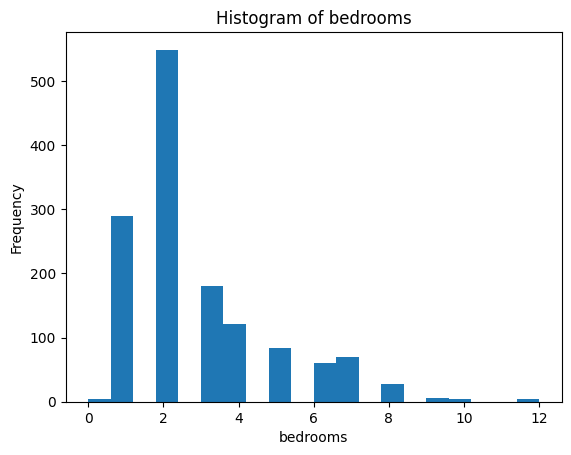

Index(['@context', '@type', 'name', 'image', 'url', 'price', 'bedrooms',
       'bathrooms', 'size', 'property_type', 'address.@type',
       'address.streetAddress', 'address.addressLocality',
       'address.postalCode', 'address.addressRegion', 'geo.@type', 'geo.name',
       'geo.latitude', 'geo.longitude'],
      dtype='object')


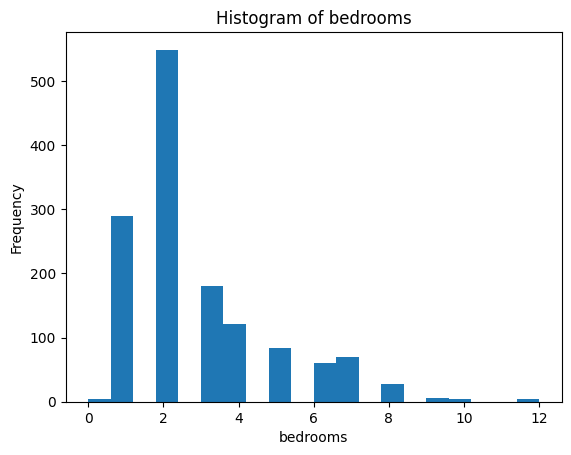

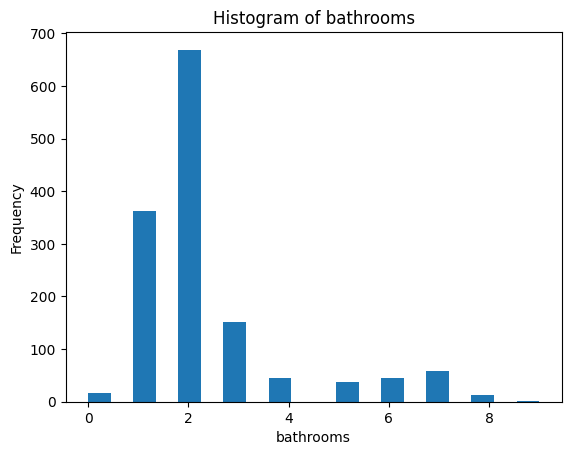

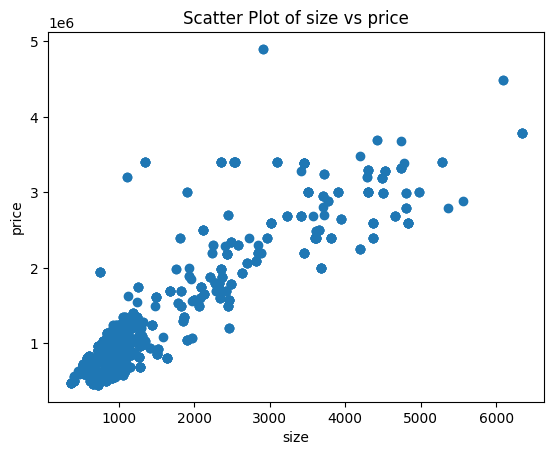

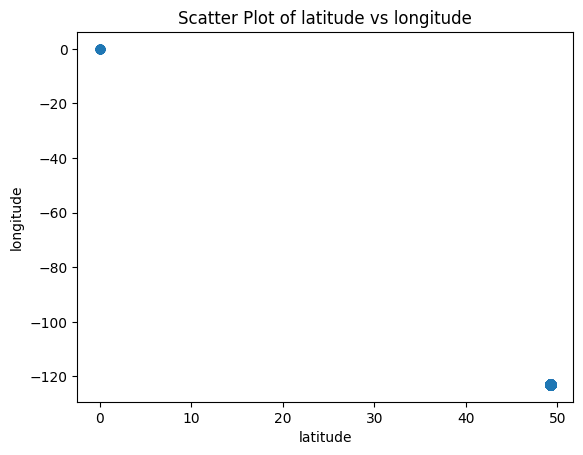

In [1523]:
import matplotlib.pyplot as plt

# find outliers
print(selected_features.columns)
plt.hist(selected_features['bedrooms'], bins=20)
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of bedrooms')
plt.show()
print(df.columns)
new_df = df.copy()

normalize_data(new_df, new_df)

# filter outliers
# new_df = new_df[(new_df['bedrooms'] < 8) & (new_df['bathrooms'] < 8)]

# outliers = [ 12, 43, 52,  56,  60, 109, 123]
# new_df = new_df.drop(outliers)

price_median = np.median(new_df["size"])
# filter outliers
# new_df = new_df[(new_df['size'] < price_median)]

plt.hist(new_df['bedrooms'], bins=20)
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of bedrooms')
plt.show()

plt.hist(new_df['bathrooms'], bins=20)
plt.xlabel('bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of bathrooms')
plt.show()

plt.scatter(new_df['size'], new_df['price'])
plt.xlabel('size')
plt.ylabel('price')
plt.title('Scatter Plot of size vs price')
plt.show()

plt.scatter(new_df['geo.latitude'], new_df['geo.longitude'])
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Scatter Plot of latitude vs longitude')
plt.show()






In [1524]:
new_X, new_Y = new_df[['geo.latitude',
                        'bedrooms','bathrooms',
                        'size']], new_df["price"]
# new_y_actual, new_y_pred = train_with_ridge(new_X, new_Y)
print(Y.shape)
x_train, x_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.1)
optimal_alpha = 0.02
model = Ridge(alpha=optimal_alpha)
model.fit(x_train, y_train)
new_y_pred = model.predict(x_test)
new_y_actual = y_test.values

mse = mean_squared_error(new_y_actual, new_y_pred)
# Calculate R-squared
# coefficient of determination
# R-squared is a measure of how well the independent
# variables explain the variability of the dependent variable
# It ranges from 0 to 1, with higher values 
# indicating a better fit of the model to the data.
v2_r2 = r2_score(new_y_actual, new_y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", v2_r2)

(1400, 1)
Mean Squared Error: 131497872157.21262
R-squared: 0.7515278182481818


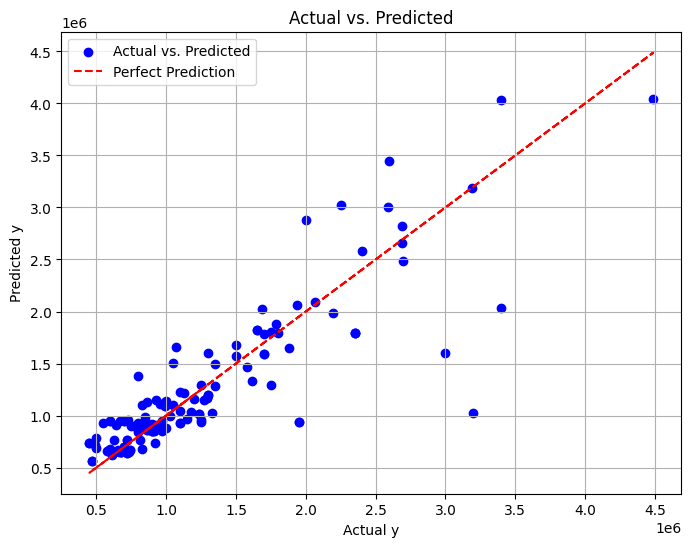

In [1525]:
import matplotlib.pyplot as plt

# Assuming y_actual and y_predicted are your actual and predicted y values, respectively

# Plot actual y vs. predicted y
plt.figure(figsize=(8, 6))
plt.scatter(new_y_actual, new_y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(new_y_actual, new_y_actual, color='red', linestyle='--', label='Perfect Prediction')  # Plotting the line of perfect prediction
plt.title('Actual vs. Predicted')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.legend()
plt.grid(True)
plt.show()


In [1526]:
import numpy as np

# Assuming y_actual and y_predicted are your actual and predicted y values, respectively

# Calculate residuals
residuals = new_y_actual - new_y_pred

# Calculate absolute residuals (absolute differences between actual and predicted values)
absolute_residuals = np.abs(residuals)

# Calculate squared residuals (squared differences between actual and predicted values)
squared_residuals = residuals ** 2

# Set a threshold for identifying outliers (e.g., 2 standard deviations)
threshold = 2 * np.std(residuals)
print(threshold)
# Identify outliers based on the threshold
outliers = np.where(np.abs(residuals) > threshold)[0]
# outliers = np.where(residuals > threshold)[0]
# Print indices of outliers
print("Indices of outliers:", outliers)

# analyze the outliers
# for outlier in outliers:
# print(new_df.iloc[43])



print("R-squared:", r2)
print("R-squared:", v2_r2)


725220.5457567202
Indices of outliers: [ 61  63  70  76  89 105 135 136]
R-squared: 0.7844147685491691
R-squared: 0.7515278182481818
